## Vertical transport figure

In [7]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [8]:
sns.set_context('paper')
sns.set_style('white')

In [9]:
def plotCSPos(ax,CS1,CS2,CS3,CS4):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [10]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc' 
PtracersOutNoC = Dataset(PtracersNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

grid = xr.open_dataset(CGrid)

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

flux = xr.open_dataset(flux_file)
fluxNoC = xr.open_dataset(fluxNoC_file)

In [11]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [12]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [35]:
ii=0
for rec in records:
    print(ii,rec.name)
    ii=ii+1
    
select_rec=[11,1,12,3,6,10,15,]
line_col = ['k','0.5','0.3','k', 'k','0.3','0.5']
line_sty = ['-','-','-',':','--','--','--']
labels = ['Base $\kappa_v$ bkg,\nhighest $\kappa_v$ cny',
          'Base',
          'Base $\kappa_v$ bkg,\nhigher $\kappa_v$ cny',
          'High $\kappa_v$ bkg',
          'Lower $N$',
          'Lower $f$',
          'Lower $U$',
          ]

0 CNTDIFF_run43
1 CNTDIFF_run38
2 CNTDIFF_run37
3 CNTDIFF_run36
4 CNTDIFF_run45
5 CNTDIFF_run73
6 CNTDIFF_run75
7 CNTDIFF_run67
8 CNTDIFF_run51
9 CNTDIFF_run69
10 CNTDIFF_run71
11 3DVISC_run01
12 3DVISC_run02
13 3DVISC_run03
14 3DVISC_run04
15 LOW_BF_run01
16 LOWER_BF_run01


In [14]:
fileBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38advTracer_CS_transports.nc')
filewatBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38water_CS_transports.nc')
filedifBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38difTracer_CS_transports.nc')
    
dfcanBase = xr.open_dataset(fileBase)
dfdifBase = xr.open_dataset(filedifBase)
dfwatBase = xr.open_dataset(filewatBase)
    
verticalBase = (dfdifBase.Vert_dif_trans_sb + dfcanBase.Vert_adv_trans_sb)  


water, Base $\kappa_v$ bkg,
highest $\kappa_v$ cny
1.15021665616
0.116800282593
adv, Base $\kappa_v$ bkg,
highest $\kappa_v$ cny
1.18052
0.132704
total tracer, Base $\kappa_v$ bkg,
highest $\kappa_v$ cny
1.22166
0.147973
water, Base
1.0
0.0
adv, Base
1.0
0.0
total tracer, Base
1.0
0.0
water, Base $\kappa_v$ bkg,
higher $\kappa_v$ cny
1.03051306518
0.0830065945678
adv, Base $\kappa_v$ bkg,
higher $\kappa_v$ cny
1.04273
0.0706584
total tracer, Base $\kappa_v$ bkg,
higher $\kappa_v$ cny
1.04731
0.0724929
water, High $\kappa_v$ bkg
1.11315013645
0.10483018757
adv, High $\kappa_v$ bkg
1.13965
0.120297
total tracer, High $\kappa_v$ bkg
1.18658
0.137692
water, Lower $N$
1.30569714633
0.186515021035
adv, Lower $N$
1.43043
0.187001
total tracer, Lower $N$
1.42936
0.187528
water, Lower $f$
0.617860563414
0.0730124765795
adv, Lower $f$
0.647845
0.110263
total tracer, Lower $f$
0.648031
0.110299
water, Lower $U$
0.753058166339
0.109574349728
adv, Lower $U$
0.725463
0.107038
total tracer, Lower $U$

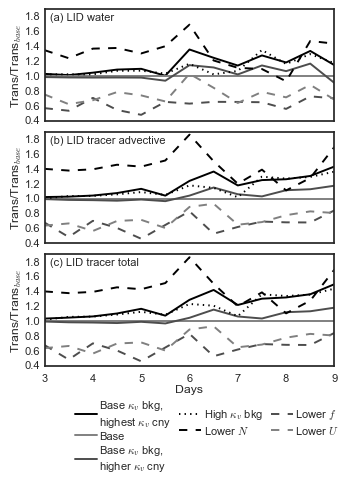

In [40]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (3.74,4.6)) # 95mm = 3.74 in, 115cm = 4.52in

gs = gspec.GridSpec(3, 1,hspace=0.1)

ax0 = plt.subplot(gs[0],xticks=[],yticks=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
ax1 = plt.subplot(gs[1],xticks=[],yticks=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
ax2 = plt.subplot(gs[2],yticks=[0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])

ii=0

# Time series

for ind in select_rec:

    file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                records[ind].run_num))+
            'advTracer_CS_transports.nc')
    
    filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'difTracer_CS_transports.nc')
    
    filewat = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'water_CS_transports.nc')
    
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    dfwat = xr.open_dataset(filewat)
    
    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)  

    ax0.plot(np.arange(6,19,1)/2.0,(dfwat.Vert_water_trans_sb[6:].data/dfwatBase.Vert_water_trans_sb[6:].data),
             linestyle=line_sty[ii],
             color=line_col[ii])
    print('water, %s' %labels[ii])
    print(np.mean(dfwat.Vert_water_trans_sb[6:].data/dfwatBase.Vert_water_trans_sb[6:].data))
    print(np.std(dfwat.Vert_water_trans_sb[6:].data/dfwatBase.Vert_water_trans_sb[6:].data))
    
    ax1.plot(np.arange(6,19,1)/2.0,(dfcan.Vert_adv_trans_sb[5:].data/dfcanBase.Vert_adv_trans_sb[5:].data),
             linestyle=line_sty[ii],
             color=line_col[ii])
    print('adv, %s' %labels[ii])
    print(np.mean(dfcan.Vert_adv_trans_sb[5:].data/dfcanBase.Vert_adv_trans_sb[5:].data))
    print(np.std(dfcan.Vert_adv_trans_sb[5:].data/dfcanBase.Vert_adv_trans_sb[5:].data))
    
    ax2.plot(np.arange(6,19,1)/2.0,(vertical[5:].data/verticalBase[5:].data),
             linestyle=line_sty[ii],
             color=line_col[ii],
             label=labels[ii])
    print('total tracer, %s' %labels[ii])
    print(np.mean(vertical[5:].data/verticalBase[5:].data))
    print(np.std(vertical[5:].data/verticalBase[5:].data))
    
    ii=ii+1
    
    
ax2.set_xlabel('Days',labelpad=0.5)
ax1.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)
ax0.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)
ax2.set_ylabel('Trans/Trans$_{base}$',labelpad=0.5)

ax0.text(0.02,0.9,'(a) LID water',transform=ax0.transAxes)
ax1.text(0.02,0.9,'(b) LID tracer advective',transform=ax1.transAxes)
ax2.text(0.02,0.9,'(c) LID tracer total',transform=ax2.transAxes)

ax0.set_ylim(0.4,1.9)   
ax1.set_ylim(0.4,1.9)   
ax2.set_ylim(0.4,1.9)   

ax2.legend(ncol=3,bbox_to_anchor=(1.05,-0.2),mode='extend',labelspacing=0.2,columnspacing=0.7,handletextpad=0.2)

ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)

plt.savefig('fig_vert_transport.eps',format='eps',bbox_inches='tight')


<xarray.Dataset>
Dimensions:              (T: 19)
Coordinates:
    Yp1                  float64 5.159e+04
  * T                    (T) float64 0.0 4.32e+04 8.64e+04 1.296e+05 ...
    Zl                   float64 -145.0
Data variables:
    CS1_water_trans      (T) float64 0.0 -712.2 -1.59e+03 -1.049e+03 ...
    CS2_water_trans      (T) float64 0.0 -147.3 -1.906e+03 -3.546e+03 -503.8 ...
    CS3_water_trans      (T) float64 0.0 383.5 1.972e+03 6.637e+03 1.989e+04 ...
    CS3b_water_trans     (T) float64 0.0 7.476e+03 2.027e+04 3.708e+04 ...
    CS4_water_trans      (T) float64 0.0 -4.488e+03 -1.511e+04 -3.419e+04 ...
    CS5_water_trans      (T) float64 0.0 -1.576e+03 -1.007e+03 685.7 ...
    Vert_water_trans_sb  (T) float64 0.0 5.969e+03 1.882e+04 3.693e+04 ...